In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [7]:
# %pylab

import numpy as np
from numpy import *
import matplotlib
from matplotlib import pylab, mlab, pyplot
plt = pyplot
matplotlib.rcParams.update({'font.size': 21})
# matplotlib.rcParams["figure.dpi"] = 300

In [3]:
def load_Temp_init_bin_Lan(str_load):   
    
    fid = open(str_load+'.bin', 'rb')
    
    junk = fromfile(fid, int32,1)        # Read record start tag
    aux  = fromfile(fid, int32,1)
    junk = fromfile(fid, int32,1)        # Read record stop tag
    N_ions = aux[0]

    junk = fromfile(fid, int32,1)        # Read record start tag
    aux  = fromfile(fid, int32,1)
    junk = fromfile(fid, int32,1)        # Read record stop tag
    j_save = aux[0]
    
    junk = fromfile(fid, int32,1)        # Read record start tag
    aux  = fromfile(fid, float64,1)
    junk = fromfile(fid, int32,1)        # Read record stop tag
    dt_j_save_next = aux[0]

    junk = fromfile(fid, int32,1)        # Read record start tag
    aux  = fromfile(fid, float64,1)
    junk = fromfile(fid, int32,1)        # Read record stop tag
    eta = aux[0]

    junk = fromfile(fid, int32  ,1   )        # Read record start tag
    Temp = fromfile(fid, float64,1)
    junk = fromfile(fid, int32  ,1   )        # Read record stop tag
    
    junk = fromfile(fid, int32  ,1   )        # Read record start tag
    save_T = fromfile(fid, float64,3*j_save)
    junk = fromfile(fid, int32  ,1   )        # Read record stop tag
    
    fid.close

    save_T = reshape(save_T,(3,j_save),order='F')

    return N_ions, j_save, dt_j_save_next, eta, Temp, save_T

In [4]:
data0 = [['D:/CIMLuser/adrien/Simulations/20200630\\DC09_RF11\\Try00',
  'D:/CIMLuser/adrien/Simulations/20200630\\DC09_RF11\\Try01',
  'D:/CIMLuser/adrien/Simulations/20200630\\DC09_RF11\\Try02',
  'D:/CIMLuser/adrien/Simulations/20200630\\DC09_RF11\\Try03',
  'D:/CIMLuser/adrien/Simulations/20200630\\DC09_RF11\\Try04',
  'D:/CIMLuser/adrien/Simulations/20200630\\DC09_RF11\\Try05',
  'D:/CIMLuser/adrien/Simulations/20200630\\DC09_RF11\\Try06',
  'D:/CIMLuser/adrien/Simulations/20200630\\DC09_RF11\\Try07',
  'D:/CIMLuser/adrien/Simulations/20200630\\DC09_RF11\\Try08',
  'D:/CIMLuser/adrien/Simulations/20200630\\DC09_RF11\\Try09',
  'D:/CIMLuser/adrien/Simulations/20200630\\DC09_RF11\\Try10',
  'D:/CIMLuser/adrien/Simulations/20200630\\DC09_RF11\\Try11',
  'D:/CIMLuser/adrien/Simulations/20200630\\DC09_RF11\\Try12']]

In [5]:
## Data loading with hardcode names

plot_point = 0
plot_try = 4
dirname_hc = str(data0[plot_point][plot_try])+'/'

datainit_hc = 'Temp_3D_Harmo_N1024_T500uK_F0.15D-20Kg_s_4'
data0_hc    = '/Temp_SimuType0_00_N01024_Vrf0070_Udc0.5000D+01V_D1.0_S1.0RFG'
data4_hc    = '/Temp_SimuType4_00_N01024_Vrf0070_Udc0.5000D+01V_D1.0_S1.0RFG'
data2_hc    = '/Temp_SimuType2_00_N01024_Vrf0070_Udc0.5000D+01V_D1.0_S1.0RFG'

print(dirname_hc)
print(datainit_hc)

D:/CIMLuser/adrien/Simulations/20200630\DC09_RF11\Try04/
Temp_3D_Harmo_N1024_T500uK_F0.15D-20Kg_s_4


In [8]:
N_ions, j_save, dt_j_save_next, eta, Temp, save_T = load_Temp_init_bin_Lan(dirname_hc+datainit_hc)

print('N_ions',N_ions)
print('j_save',j_save)
print('dt*j_save_next',dt_j_save_next)
print('eta',eta)
print('Temp',Temp)
print('save_T',save_T)
print('shape(save_T)',shape(save_T))

#  Sacahnt que dans le Fortran
# dt   = 2d-9
# j_save_next  = 100
# eta = 1.5d-21
# Temperature = 0.5d-3

N_ions 1024
j_save 4999
dt*j_save_next 2.0000000000000002e-07
eta 1.5e-21
Temp [0.0005]
save_T [[2.98640293e-01 9.26836488e-01 1.72233479e+01 ... 5.02718886e-04
  5.06381304e-04 5.14963582e-04]
 [2.29405876e+01 5.86023982e+01 2.94960511e+01 ... 4.85158079e-04
  4.94780753e-04 4.99651846e-04]
 [9.72170265e+02 2.68392405e+03 3.07104504e+03 ... 5.00305173e-04
  4.95018295e-04 4.89415063e-04]]
shape(save_T) (3, 4999)


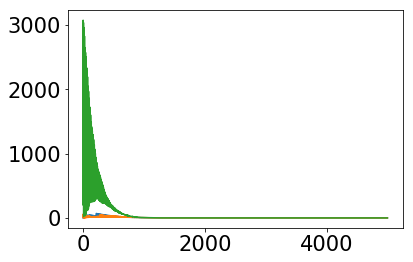

In [10]:
plt.figure('test plot T Langevin');plt.clf()
for k in range(3):
    plt.plot(save_T[k])